In [1]:
# Load necessary library for visualization
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



In [2]:
# Load and inspect the dataset
combined_dataset <- read.csv("/content/station00.csv")  # Replace with your file path
cat("First few rows of the dataset:\n")
print(head(combined_dataset, 5))

First few rows of the dataset:
            date_time nwp_globalirrad nwp_directirrad nwp_temperature
1 2018-08-15 16:00:00               0               0           22.78
2 2018-08-15 16:15:00               0               0           22.75
3 2018-08-15 16:30:00               0               0           22.71
4 2018-08-15 16:45:00               0               0           22.64
5 2018-08-15 17:00:00               0               0           22.57
  nwp_humidity nwp_windspeed nwp_winddirection nwp_pressure lmd_totalirrad
1        96.85          4.28            339.41      1007.27              0
2        96.91          4.30            337.27      1007.27              0
3        96.95          4.28            334.47      1007.48              0
4        97.12          4.28            331.52      1007.39              0
5        97.15          4.33            329.78      1007.09              0
  lmd_diffuseirrad lmd_temperature lmd_pressure lmd_winddirection lmd_windspeed
1                0 

In [9]:
# Select columns 2 to 14 (2-13 for features, 14 as target 'power')
selected_data <- combined_dataset[, 2:15]

In [10]:
# Calculate the correlation matrix for the selected columns
cor_matrix <- cor(selected_data, use = "complete.obs")

In [11]:
# Display only correlations between columns 2-13 and the target column (14 - 'power')
cor_with_power <- cor_matrix[1:13, 14, drop = FALSE]  # Only select correlations with 'power'

In [12]:
# Print the correlation values to examine the relationship numerically
cat("Correlation of each feature with power:\n")
print(cor_with_power)

Correlation of each feature with power:
                        power
nwp_globalirrad    0.92626824
nwp_directirrad    0.92152934
nwp_temperature    0.43025792
nwp_humidity      -0.37527281
nwp_windspeed      0.20509488
nwp_winddirection  0.01248865
nwp_pressure      -0.15798635
lmd_totalirrad     0.97777161
lmd_diffuseirrad   0.84156643
lmd_temperature    0.37912426
lmd_pressure      -0.17831318
lmd_winddirection  0.02242567
lmd_windspeed      0.38351396


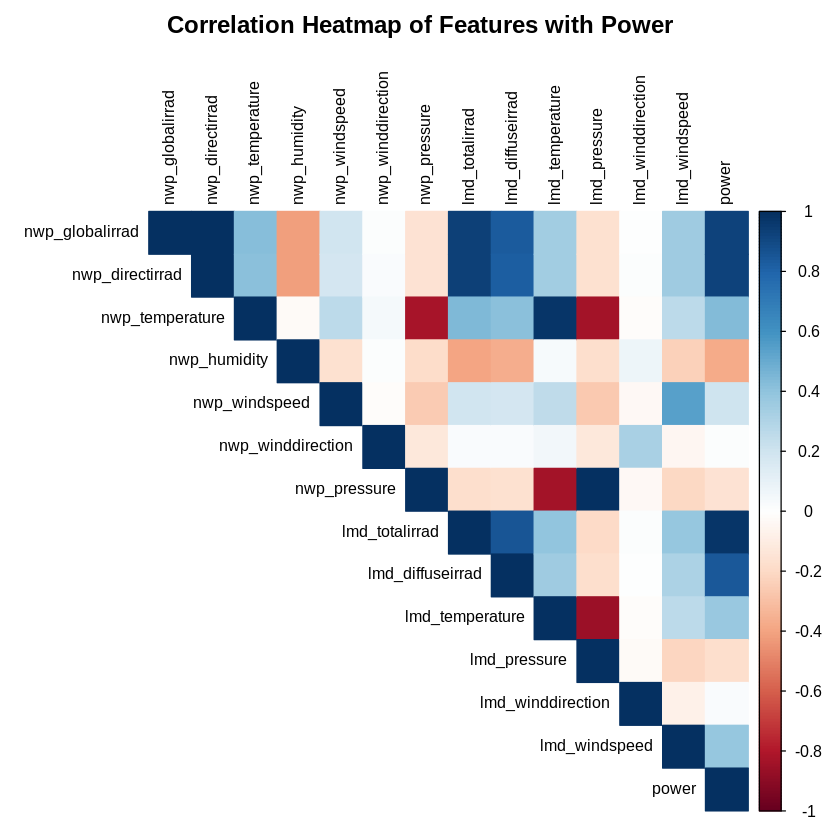

In [13]:
# Visualize the correlation matrix with focus on the power relationship
corrplot(cor_matrix, method = "color", type = "upper", tl.col = "black", tl.cex = 0.8,
         title = "Correlation Heatmap of Features with Power", mar = c(0, 0, 2, 0))
# Highlight correlations with 'power' by displaying them in the plot title